# **Sentiment Analysis using LSTM**
Dateset: [Large Movie Review Dataset
](https://ai.stanford.edu/~amaas/data/sentiment/)


# What is <code>RNN</code>?

<p style='text-align: justify;'> Recurrent Neural Network (RNN) is a generalization of feed-forward neural network that has an internal memory. RNN is recurrent in nature as it performs the same function for every input of data while the output of the current input depends on the past one computation. After producing the output, it is copied and sent back into the recurrent network. For making a decision, it considers the current input and the output that it has learned from the previous input. </p>

<p style='text-align: justify;'> Unlike feed-forward neural networks, RNNs can use their internal state (memory) to process sequences of inputs. This makes RNN applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition. In other neural networks, all the inputs are independent of each other. But in RNN, all the inputs are related to each other. </p>

 <img src="https://miro.medium.com/max/627/1*go8PHsPNbbV6qRiwpUQ5BQ.png" />


# Drawbacks of RNN in Back-Propagation



![](https://drive.google.com/uc?id=1avT9UYZuLMTsBIJGJq-AK845tn54NaRJ)




![](https://drive.google.com/uc?id=1qq-78ZuR-abfhCiyrQxu1JyEVmoWxFNL)


## Vanishing Gradient

![](https://drive.google.com/uc?id=1vTIlWQAxKMRNSlMhgB5DdXuDnfeA8BLn)


## Exploring Gradient


![](https://drive.google.com/uc?id=1J6Ufr_hIr8LEzDeXEdjnWOPrSpKO8tHP)


# Father of LSTM - Juergen Schmidhuber


<img src="https://analyticsindiamag.com/wp-content/uploads/2018/09/jurgen-banner.png" />


# What is <code>LSTM</code>?

Long Short Term Memory (LSTM) were born to resolve these issues of RNN and it allows to keep or forget information. LSTM has an additional controller to controller the entire memory called **Cell State**, which serves as a tranmission highway for relevent information to be transferred all the way down the sequence chain. Even though the infomation from the earlier time steps are able travel to later time steps, thereby reducing the impact of short-term memory.

<img src="https://miro.medium.com/max/875/1*0f8r3Vd-i4ueYND1CUrhMA.png" />


# **1 Import Libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, auc

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model, model_from_json
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from keras.utils.vis_utils import plot_model

import plotly
import plotly.express as px 
import plotly.io as pio 
import plotly.offline as py 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff 
from plotly.subplots import make_subplots

Disable Tensorflow Warning

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# **2 Read Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# data = pd.read_csv('C:/Users/X/Desktop/NLP/cleaned_IMDB.csv')
data = pd.read_csv('/content/drive/Shareddrives/NLP/NLP Assignment/cleaned_IMDB.csv')
data.head()

,review,cleaned_bert_review,cleaned_review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,bromwell high is a cartoon comedy it ran at th...,bromwell high cartoon comedy run time program ...,1
1,Homelessness (or Houselessness as George Carli...,homelessness or houselessness as george carlin...,homelessness houselessness george carlin state...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant overacting by lesley ann warren best...,brilliant overact lesley ann warren well drama...,1
3,This is easily the most underrated film inn th...,this is easily the most underrated film inn th...,easily underrated film inn brooks cannon sure ...,1
4,This is not the typical Mel Brooks film. It wa...,this is not the typical mel brooks film it was...,not typical mel brooks film much less slapstic...,1


# **3 Remove Unwanted Columns**

In [5]:
# Removing unwanted columns
data = data.loc[:, data.columns.intersection(['cleaned_review','sentiment'])]
data.head()

,cleaned_review,sentiment
0,bromwell high cartoon comedy run time program ...,1
1,homelessness houselessness george carlin state...,1
2,brilliant overact lesley ann warren well drama...,1
3,easily underrated film inn brooks cannon sure ...,1
4,not typical mel brooks film much less slapstic...,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cleaned_review  50000 non-null  object
 1   sentiment       50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [7]:
print("Rows     : ", data.shape[0])
print("Columns  : ", data.shape[1])
print("Shape    : ", data.shape)
print("Features : ", data.columns.tolist())

Rows     :  50000
Columns  :  2
Shape    :  (50000, 2)
Features :  ['cleaned_review', 'sentiment']


# **4 Tokenization**

<p style='text-align: justify;'> <code>Tokenizer()</code> allows to vectorize a text corpus, by turning each text into a sequence of integers. Since we have gone through the data preprocessing before, therefore we do not need to use the parameter inside to redo again the process. </p>

<p style='text-align: justify;'> <code>fit_on_texts</code> updates internal vocabulary based on a list of texts. This is the process before <code>texts_to_sequences</code>. </p>


In [8]:
imdb = data['cleaned_review'].values.tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(imdb)

## 4.1 Word Count

The <code>word_count</code> shows the number of times words occur in the text corpus.


In [9]:
tokenizer.word_counts

OrderedDict([('bromwell', 8),
             ('high', 4469),
             ('cartoon', 1448),
             ('comedy', 6873),
             ('run', 5320),
             ('time', 29237),
             ('program', 643),
             ('school', 3412),
             ('life', 12932),
             ('teacher', 780),
             ('35', 206),
             ('year', 12096),
             ('teach', 764),
             ('profession', 135),
             ('lead', 5862),
             ('believe', 5970),
             ('satire', 496),
             ('much', 18895),
             ('close', 2956),
             ('reality', 1997),
             ('scramble', 46),
             ('survive', 976),
             ('financially', 56),
             ('insightful', 136),
             ('student', 1480),
             ('see', 46368),
             ('right', 6551),
             ('pathetic', 930),
             ('pomp', 14),
             ('pettiness', 6),
             ('whole', 6070),
             ('situation', 2277),
             ('remin

## 4.2 Document Count

The <code>document_count</code> shows the number of documents present in our corpus.



In [10]:
print("Document Count : ", tokenizer.document_count)

Document Count :  50000


## 4.3 Word Index

The <code>word_index</code> assigns a unique index to each word present in the text. 

In [11]:
tokenizer.word_index

{'not': 1,
 'movie': 2,
 'film': 3,
 'one': 4,
 'see': 5,
 'make': 6,
 'like': 7,
 'good': 8,
 'get': 9,
 'well': 10,
 'would': 11,
 'time': 12,
 'character': 13,
 'go': 14,
 'watch': 15,
 'bad': 16,
 'even': 17,
 'story': 18,
 'no': 19,
 'really': 20,
 'think': 21,
 'show': 22,
 'scene': 23,
 'great': 24,
 'look': 25,
 'say': 26,
 'much': 27,
 'know': 28,
 'could': 29,
 'people': 30,
 'also': 31,
 'end': 32,
 'give': 33,
 'take': 34,
 'first': 35,
 'love': 36,
 'way': 37,
 'play': 38,
 'come': 39,
 'thing': 40,
 'find': 41,
 'man': 42,
 'act': 43,
 'seem': 44,
 'want': 45,
 'many': 46,
 'plot': 47,
 'life': 48,
 'two': 49,
 'actor': 50,
 'work': 51,
 'never': 52,
 'little': 53,
 'try': 54,
 'year': 55,
 'ever': 56,
 'feel': 57,
 'still': 58,
 'part': 59,
 'use': 60,
 'something': 61,
 'lot': 62,
 'back': 63,
 'old': 64,
 'real': 65,
 'director': 66,
 'we': 67,
 'guy': 68,
 'performance': 69,
 'funny': 70,
 'woman': 71,
 'actually': 72,
 'though': 73,
 'cast': 74,
 'another': 75,
 'big

## 4.4 Words Docs

The <code>word_doc</code> shows in how many documents each of the words appear. 

In [12]:
tokenizer.word_docs

defaultdict(int,
            {'pettiness': 6,
             'repeatedly': 260,
             'episode': 2525,
             'satire': 402,
             'know': 13243,
             'expect': 4235,
             'high': 3814,
             'think': 14866,
             'sack': 85,
             'run': 4412,
             'financially': 53,
             'insightful': 132,
             'program': 500,
             'not': 40989,
             'right': 5503,
             'lead': 4947,
             'pity': 416,
             'see': 26289,
             'year': 9191,
             'immediately': 849,
             'time': 19295,
             'close': 2677,
             'adult': 1311,
             'life': 9069,
             'survive': 874,
             '35': 199,
             'believe': 5105,
             'much': 13829,
             'inspector': 191,
             'pomp': 13,
             'fetched': 35,
             'school': 2507,
             'profession': 129,
             'teach': 660,
             'cart

# **5 Text to Sequences**


<p style='text-align: justify;'> <code>texts_to_sequences</code> converts each text to sequence of integers.
</p>

In [13]:
sequences = []
max_sequence_len = 0

for text in imdb:
    # Convert texts to sequence
    txt_to_seq = tokenizer.texts_to_sequences([text])[0]
    sequences.append(txt_to_seq)
    # Find max_sequence_len of review for padding
    length = len(txt_to_seq)
    if length > max_sequence_len:
        max_sequence_len = length

In [14]:
tts = pd.DataFrame({'Before':imdb,'After':sequences})
tts.head()

,Before,After
0,bromwell high cartoon comedy run time program ...,"[25581, 185, 666, 101, 152, 12, 1363, 269, 48,..."
1,homelessness houselessness george carlin state...,"[24099, 71087, 567, 10756, 571, 659, 55, 52, 6..."
2,brilliant overact lesley ann warren well drama...,"[419, 1987, 13506, 1856, 3789, 10, 799, 12930,..."
3,easily underrated film inn brooks cannon sure ...,"[591, 1804, 3, 10388, 2670, 3670, 160, 3841, 1..."
4,not typical mel brooks film much less slapstic...,"[1, 641, 2783, 2670, 3, 27, 240, 1902, 2, 72, ..."


# **6 Padding**


<p style='text-align: justify;'> Considering all the sentences have different length, however in Neural Netwroks we need to have same input shape and size, this is where the padding is necessary. On the other hand, we can defind the maximum number of words for each sentence, see if a sentence is longer then we might drop some words. The maximum number of words has been identified on the above cell, <code>max_sequence_len</code>. </p>

Example:
1. I love Natural Language Processing -> [1, 2, 3, 4, 5] -> [1, 2, 3, 4, 5]
2. I eat apple -> [1, 6, 7] -> [1, 6, 7, 0, 0]
3. I am a good boy -> [1, 8, 9, 10] -> [1, 8, 9, 10, 0]

In [15]:
padded_sequences = pad_sequences(sequences, 
                                 maxlen=max_sequence_len, 
                                 padding='post',
                                 truncating='post')

In [16]:
print(f'Before: {sequences[0]}')
print(f'After: {padded_sequences[0].tolist()}')

Before: [25581, 185, 666, 101, 152, 12, 1363, 269, 48, 1144, 3343, 55, 1172, 4573, 136, 134, 25581, 185, 1674, 27, 315, 466, 1144, 9530, 934, 8403, 4552, 647, 5, 107, 973, 1144, 19130, 29564, 127, 421, 582, 269, 28, 647, 5, 171, 647, 2747, 54, 997, 269, 1008, 1453, 185, 227, 115, 2874, 6138, 4, 1144, 647, 1809, 25581, 185, 164, 46, 623, 365, 21, 25581, 185, 138, 11308, 1895, 1]
After: [25581, 185, 666, 101, 152, 12, 1363, 269, 48, 1144, 3343, 55, 1172, 4573, 136, 134, 25581, 185, 1674, 27, 315, 466, 1144, 9530, 934, 8403, 4552, 647, 5, 107, 973, 1144, 19130, 29564, 127, 421, 582, 269, 28, 647, 5, 171, 647, 2747, 54, 997, 269, 1008, 1453, 185, 227, 115, 2874, 6138, 4, 1144, 647, 1809, 25581, 185, 164, 46, 623, 365, 21, 25581, 185, 138, 11308, 1895, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **7 Splitting Data (50%)**

In [17]:
X_train = padded_sequences[25000:]
X_test = padded_sequences[:25000]

y_train = data['sentiment'].iloc[25000:]
y_test = data['sentiment'].iloc[:25000]

review = imdb[:25000]

# **8 Modelling**

Stacked Bidirectional Long Short-Term Memory

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=max_sequence_len))
model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(None, 1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.0001), activity_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l1(0.0001), activity_regularizer=tf.keras.regularizers.l2(0.0001)))
adam = Adam(learning_rate=0.001)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer=adam, 
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1430, 64)          13067328  
_________________________________________________________________
bidirectional (Bidirectional (None, 1430, 128)         66048     
_________________________________________________________________
dropout (Dropout)            (None, 1430, 128)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [ ]:
history = model.fit(
    X_train, 
    y_train.values, 
    epochs=5,
    verbose=1,
    validation_split=0.1,
    batch_size=64
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4994: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



352/352 [==============================] - 248s 672ms/step - loss: 0.4576 - accuracy: 0.8074 - val_loss: 0.3133 - val_accuracy: 0.8748
Epoch 2/5
352/352 [==============================] - 235s 667ms/step - loss: 0.1821 - accuracy: 0.9432 - val_loss: 0.4607 - val_accuracy: 0.8152
Epoch 3/5
352/352 [==============================] - 233s 662ms/step - loss: 0.0806 - accuracy: 0.9793 - val_loss: 0.8608 - val_accuracy: 0.7776
Epoch 4/5
352/352 [==============================] - 232s 660ms/step - loss: 0.0592 - accuracy: 0.9866 - val_loss: 0.8676 - val_accuracy: 0.7764
Epoch 5/5
352/352 [==============================] - 233s 662ms/step - loss: 0.0479 - accuracy: 0.9883 - val_loss: 0.7445 - val_accuracy: 0.7988


In [ ]:
model.evaluate(X_test, y_test, batch_size=64)

391/391 [==============================] - 96s 246ms/step - loss: 0.6575 - accuracy: 0.8305


[0.6575305461883545, 0.83051997423172]

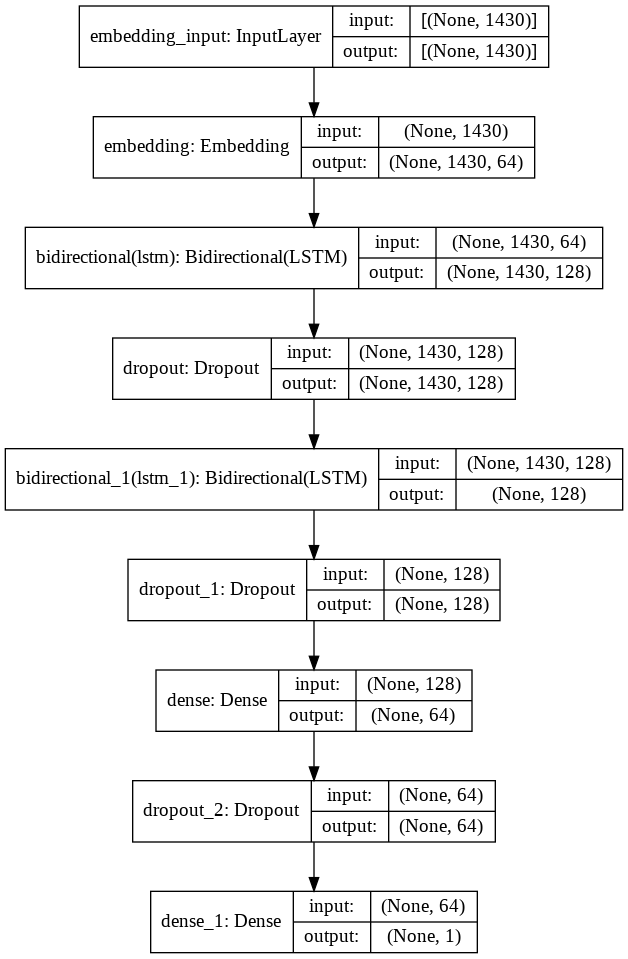

In [ ]:
plot_model(model, to_file='/content/drive/Shareddrives/NLP/NLP Assignment/Lim Chia Chung/lstm_model.png', show_shapes=True, show_layer_names=True)

# **9 Save & Load Model**

In [ ]:
# Keras Save Model Format
# model.save('C:/Users/X/Desktop/NLP/Lim Chia Chung/lstm')
model.save('/content/drive/Shareddrives/NLP/NLP Assignment/Lim Chia Chung/lstm')

# Keras H5 Format
model.save('/content/drive/Shareddrives/NLP/NLP Assignment/Lim Chia Chung/lstm.h5')

# Keras JSON Format
# model.to_json()

# Keras YAML Format
# model.to_yaml()

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/NLP/NLP Assignment/Lim Chia Chung/lstm/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/NLP/NLP Assignment/Lim Chia Chung/lstm/assets


In [18]:
# lstm = load_model('C:/Users/X/Desktop/NLP/Lim Chia Chung/lstm')
lstm = load_model('/content/drive/Shareddrives/NLP/NLP Assignment/Lim Chia Chung/lstm')

# **10 Prediction**

In [19]:
# Make prediction on testing data
prediction = lstm.predict(X_test)

In [20]:
prediction[:5]

array([[0.9967933 ],
       [0.48143598],
       [0.9976793 ],
       [0.9895347 ],
       [0.9968976 ]], dtype=float32)

In [21]:
# Convert the values in prediction to 1 or 0 (binary)
prediction_binary = []

for ele in prediction:
    if ele > 0.5:
        prediction_binary.append(1)
    else:
        prediction_binary.append(0)

In [22]:
prediction_binary[:5]

[1, 0, 1, 1, 1]

In [23]:
analysis = pd.DataFrame({'Movie Review': review,
                         'y_true': y_test,
                         'y_pred': prediction_binary})
analysis.sample(10)

,Movie Review,y_true,y_pred
16074,tooth fairy set small town somewhere northern ...,0,0
24602,average movie poor music consider movie base m...,0,1
14244,intention director film quite honorable histor...,0,0
18451,almost unfathomable film would bust indeed dis...,0,0
7257,not knowmaybe impressive tribute muslim religi...,1,1
10460,dentist make time almost every profession psyc...,1,1
17659,film feature ben chaplin bored bank employee e...,0,0
4080,yeahit low budget yeahit one candys early film...,1,1
7298,forget b movie forget many way outdate instead...,1,1
7532,admittedly no ardent student genre matter fact...,1,1


# **11 Evaluation**

## 11.1 Classification Report

In [24]:
print(classification_report(y_test, prediction_binary))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83     12500
           1       0.82      0.84      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



## 11.2 Confusion Matrix

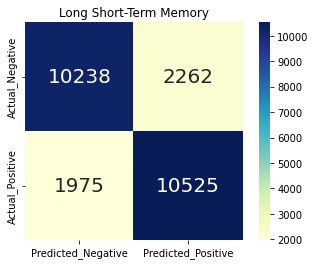

In [25]:
lstm_cm = confusion_matrix(y_test, prediction_binary)
sns.heatmap(lstm_cm, xticklabels = ['Predicted_Negative', 'Predicted_Positive'], yticklabels = ['Actual_Negative', 'Actual_Positive'], 
            annot = True, fmt = 'd', annot_kws = {'fontsize':20}, cmap="YlGnBu", square = True);

plt.title("Long Short-Term Memory")
plt.subplots_adjust(wspace = .3,hspace = .3)

## 11.3 Accuracy and Loss

In [ ]:
# Evaluate the model on training set
train_acc = lstm.evaluate(X_train, y_train, batch_size=64)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4994: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



391/391 [==============================] - 98s 247ms/step - loss: 0.0968 - accuracy: 0.9769


In [ ]:
# Evaluate the model on testing set
test_acc = lstm.evaluate(X_test, y_test, batch_size=64)

391/391 [==============================] - 96s 246ms/step - loss: 0.6575 - accuracy: 0.8305


In [ ]:
print('Accuracy of LSTM on training set: {:.3f}'.format(train_acc[1]))
print('Accuracy of LSTM on testing set : {:.3f}\n'.format(test_acc[1]))

print('Loss of LSTM on training set: {:.3f}'.format(train_acc[0]))
print('Loss of LSTM on testing set : {:.3f}'.format(test_acc[0]))

Accuracy of LSTM on training set: 0.977
Accuracy of LSTM on testing set : 0.831

Loss of LSTM on training set: 0.097
Loss of LSTM on testing set : 0.658


In [ ]:
fig = make_subplots(rows=1, cols=2)

# Left
fig.add_trace(
    go.Scatter(y=history.history['accuracy'], 
               mode='lines',
               name='Accuracy'),
    row=1, col=1, secondary_y=False
)

fig.add_trace(
    go.Scatter(y=history.history['val_accuracy'], 
               mode='lines',
               name='Val_Accuracy'),
    row=1, col=1, secondary_y=False
)

# Right
fig.add_trace(
    go.Scatter(y=history.history['loss'], 
               mode='lines',
               name='Loss'),
    row=1, col=2, secondary_y=False
)

fig.add_trace(
    go.Scatter(y=history.history['val_loss'], 
               mode='lines',
               name='Val_Loss'),
    row=1, col=2, secondary_y=False
)

fig.show()

## 11.4 Model Performance

In [ ]:
def model_report(testing_y, prediction):
  accuracy = accuracy_score(testing_y, prediction)
  precision = precision_score(testing_y, prediction)
  recall = recall_score(testing_y, prediction)
  f1score = f1_score(testing_y, prediction)

  df = pd.DataFrame({"Accuracy_score" : [accuracy],
                    "Recall_score" : [recall],
                    "Precision" : [precision],
                    "F1_score" : [f1score]
                    })
  return df

score = model_report(y_test, prediction_binary)

model_performances = pd.concat([score], axis=0).reset_index()
model_performances = model_performances.drop(columns = "index", axis = 1)
table = ff.create_table(np.round(model_performances, 4))
py.iplot(table)

## 11.5 Receiver Operating Characteristics (ROC) & Area Under Curve (AUC)

In [ ]:
def Calculate_Plot_ROC(y_test, y_pred, name):
  # Calculate ROC curve
  fpr, tpr, thr = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr,tpr)
  # Plot the ROC curve
  plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
  plt.plot(fpr, tpr, label ='ROC Curve (Area = %0.2f)' %roc_auc)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title(f'ROC Curve for {name}')
  plt.legend(loc ='best')

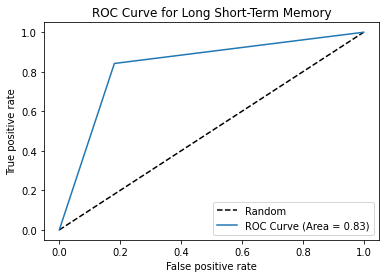

In [ ]:
Calculate_Plot_ROC(y_test, prediction_binary, 'Long Short-Term Memory')